# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# 1 Severstal: Steel Defect Detection
## 1.1 Introduction to Case Study

Source:https://www.kaggle.com/c/severstal-steel-defect-detection

  <p> 1.Severstal is leading the charge in efficient steel mining and production.</p>

  <p> 2. The production process of flat sheet steel is especially delicate. From heating and rolling, to drying and cutting, several machines touch flat steel by the time it’s ready to ship. Today, Severstal uses images from high frequency cameras to power a defect detection algorithm.</p>

  <p> 3. The gaol of this competition is to localize and classify surface defects on a steel sheet.</p>

  source:https://software.intel.com/en-us/articles/use-machine-learning-to-detect-defects-on-the-steel-surface

  <p> 4. Surface quality is the essential parameter for steel sheet. In the steel industry, manual defect inspection is a tedious assignment. Consequently, it is difficult to guarantee the surety of a flawless steel surface. To meet user requirements, vision-based automatic steel surface investigation strategies have been proven to be exceptionally powerful and prevalent solutions over the past two decades</p>

## 1.2 Business Problem Statement

<p>  Severstal aims to achieve the following:


1. Built machine leanring models which can predict the defective steels sheets and also identify the area/location of the defects along with the defect type

2. High accurate models will help to 
  An unordered list:
  *  Automate the process of defect identification
  *  Increase efficiency
  *  Improve the quality of outputs
  *  Help serve customers better by prodiving them the quality promiseds
 
 
</p>

##1.3 About the SeverSteel Dataset

<p>The `train.csv` data set provided by SeverSteele contains the following features:</p>

<p>In this competition you will be predicting the location and type of defects found in steel manufacturing. Images are named with a unique ImageId. You must segment and classify the defects in the test set.

Each image may have no defects, a defect of a single class, or defects of multiple classes. For each image you must segment defects of each class (ClassId = [1, 2, 3, 4]).

The segment for each defect class will be encoded into a single row, even if there are several non-contiguous defect locations on an image. </p>

Feature | Description 
----------|---------------
**`ImageId`** | A unique identifier for the image. **Example:** `002cc93b.jpg`   
**`ClassId`**    | The class of the defect from [1,2,3,4] **Examples:**<br><ul><li><code> 1</code></li>
**`Encoded Pixels`** | The pixels which have the defect: <br/><ul><li><code>29102 12 29346 24 29602 24 29858 24 30114 24</code></li>
    
##1.4 Understanding the pixel encoding
<p>EncodedPixels
In order to reduce the submission file size, our metric uses run-length encoding on the pixel values. Instead of submitting an exhaustive list of indices for your segmentation, you will submit pairs of values that contain a start position and a run length. E.g. '1 3' implies starting at pixel 1 and running a total of 3 pixels (1,2,3).

The competition format requires a space delimited list of pairs. For example, '1 3 10 5' implies pixels 1,2,3,10,11,12,13,14 are to be included in the mask. The metric checks that the pairs are sorted, positive, and the decoded pixel values are not duplicated. The pixels are numbered from top to bottom, then left to right: 1 is pixel (1,1), 2 is pixel (2,1), etc.</p>

##1.5 Metric for Evaluation

The formula is given by:

2∗|X∩Y|/|X|+|Y|
where X is the predicted set of pixels and Y is the ground truth. The Dice coefficient is defined to be 1 when both X and Y are empty.

Few examples of Dice calculation

Example 1: X=[0,0,0,0
              0,0,0,0
              0,0,0,0
              0,0,0,0]
           Y=[0,0,0,0
              0,0,0,0
              0,0,0,0
              0,0,0,0]  

     DC = No defect/No defect = 1

Example 2: X=[1,1,1,1
              1,1,1,1
              1,1,1,1
              1,1,1,1]
           Y=[1,1,1,1
              1,1,1,1
              1,1,1,1
              1,1,1,1]
    
    DC = 2*16/(16+16) = 1 

Example 3: X=[0,0,0,0
              1,1,1,1
              1,1,1,1
              1,1,1,1]
           Y=[0,0,0,1
              1,1,1,1
              1,1,1,1
              1,1,1,1]
     
     DC = 2*12/(12+13)=24/25  

 Example 4: X=[0,0,0,0
              1,1,1,1
              0,0,1,1
              1,1,1,1]
           Y=[0,0,0,1
              1,1,1,1
              1,1,1,1
              1,0,0,1]
     
     DC = 2*8/(10+11)=16/21                                 

##1.6 Business Constraints
1. Latency - The model should be able to predict the pretty quickly. Infact in an ideal case if the images are streamed , predictions and image generation should match

2. Interpretability - Not needed. As long as the manual inspection of the images shows that the model is identifying defective areas with high accuracy, the reasoning is not needed

3. Defects can be costly depdendinh upon the model accuracy for the different defect class. Wrong classification of defects can lead to wrong categorization of steel during quality evaluation. This can lead to wronf quality steel being sent to the customers and hence not meeting the SLA(Service Level Agreement)

##1.7 Some Useful links
1.  https://www.kaggle.com/c/severstal-steel-defect-detection/discussion/114309?rvi=1
2. https://www.kaggle.com/go1dfish/clear-mask-visualization-and-simple-eda
3. https://medium.com/analytics-vidhya/severstal-steel-defect-detection-2d2e836855c2
4. https://github.com/qubvel
5. https://www.kaggle.com/c/severstal-steel-defect-detection/discussion/114254


#2 Reading the data

## 2.1 Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import  Flatten , Input , Dense , Dropout, Concatenate , BatchNormalization , Conv2D , GlobalAveragePooling2D, Activation
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.optimizers import Adam , SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,TensorBoard
from sklearn.metrics import classification_report ,log_loss, accuracy_score , confusion_matrix, multilabel_confusion_matrix
import tensorflow.keras.backend as K
from tqdm.notebook import tqdm
%load_ext tensorboard
import datetime
from tensorflow.keras.utils import Sequence

from PIL import Image
from pathlib import Path
from collections import defaultdict

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


## 2.2 Reading the Data File with Image Name and Encoded Pixel

In [ ]:
# This file contains images which have defect only. One image can have 1 or more defects
train_data = pd.read_csv(r'input/train.csv')

In [ ]:
train_data.head()

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg        1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg        3  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg        1  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg        4  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg        3  229501 11 229741 33 229981 55 230221 77 230468...

#3 Exploratory Data Analysis

In [ ]:
#Total no of defects
print("Total no of defects are:", train_data.shape[0])
print("Total no of defective images are:",len(train_data['ImageId'].unique()))

Total no of defects are: 7095
Total no of defective images are: 6666


##3.1 Defect Distribution

In [ ]:
defect_dis=Counter(train_data['ClassId'].values)
print(defect_dis)

Counter({3: 5150, 1: 897, 4: 801, 2: 247})


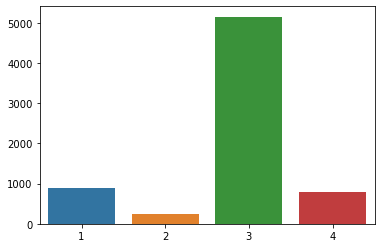

In [ ]:
sns.barplot(list(defect_dis.keys()),list(defect_dis.values()))

### We have imbalanced dataset

##3.2 Lets see how many defects does each image have

In [ ]:
i=0
count_last =1
while i < (len(train_imgs)-1):
    #print("Value of i",i)
    count =1
    for j in range(i+1,len(train_imgs)):
        #print("Value of j",j)
        if j == len(train_imgs)-1:
            if train_imgs[i] == train_imgs[j]:
                count =count+1
                image_defect_dis[count] = image_defect_dis[count]+1
                i = i+1
            else:
                image_defect_dis[count] = image_defect_dis[count]+1
                image_defect_dis[count_last] =image_defect_dis[count_last]+1
                i = j
        else:    
            if train_imgs[i] == train_imgs[j]:
                count=count+1
            else:
                image_defect_dis[count]=image_defect_dis[count]+1
                i=j
                break

In [ ]:
image_defect_dis

{1: 6239, 2: 425, 3: 2, 4: 0}

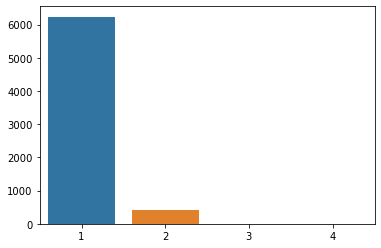

In [ ]:
sns.barplot(list(image_defect_dis.keys()),list(image_defect_dis.values()))

### As we can see most of the Images have 1 defect type only and rest have 2 defects. Having 3 or 4 defect type is rare

##3.3 Lets calculate no of non defective images

In [ ]:
import os
files = os.listdir('train_images')
total_images =[]
count=0
for file in files:
    total_images.append(file)
    count=count+1
defective_images=set(train_data['ImageId'].unique())  
#len(defective_images)
print("No of non defective images is:",len(total_images)-len(defective_images))

No of non defective images is: 5902


#### Defective versus Non defective the class is almost balanced with 5902 and 7095 data points respectively
#### However there is class imbalance with 1,2,4 having fewer data points 

##3.4 Check Train and Test Image size

In [ ]:
#https://www.kaggle.com/go1dfish/clear-mask-visualization-and-simple-eda
from PIL import Image
from pathlib import Path
from collections import defaultdict
train_size_dict = defaultdict(int)
train_path = Path("train_images/")

for img_name in train_path.iterdir():
    img = Image.open(img_name)
    train_size_dict[img.size] += 1
train_size_dict    

defaultdict(int, {(1600, 256): 12568})

In [ ]:
test_size_dict = defaultdict(int)
test_path = Path("test_images/")

for img_name in test_path.iterdir():
    img = Image.open(img_name)
    test_size_dict[img.size] += 1
test_size_dict        

defaultdict(int, {(1600, 256): 5506})

### All images have size (1600,256)

##3.4 Lets create our training data set which has both defective and not defective data points together

In [ ]:
train_dataset = pd.DataFrame(columns=['ImageId','ClassId'])

In [ ]:
train_dataset.head()

Empty DataFrame
Columns: [ImageId, ClassId]
Index: []

In [ ]:
train_path = Path("train_images/")

for img_name in train_path.iterdir():
    #print(img_name)
    for i in range(1,5):
        train_dataset =train_dataset.append({'ImageId': repr(str(img_name)).split('\\')[2][0:-1], 'ClassId':i}, ignore_index=True)  

In [ ]:
for img_name in train_path.iterdir():
    print(type(img_name))
    print(repr(str(img_name)))
    print(repr(str(img_name)).split('\\'))

In [ ]:
train_dataset.head()

ImageId ClassId
0  0002cc93b.jpg       1
1  0002cc93b.jpg       2
2  0002cc93b.jpg       3
3  0002cc93b.jpg       4
4  00031f466.jpg       1

In [ ]:
len(train_dataset)

50272

In [ ]:
train_data.head()

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg        1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0007a71bf.jpg        3  18661 28 18863 82 19091 110 19347 110 19603 11...
2  000a4bcdd.jpg        1  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3  000f6bf48.jpg        4  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4  0014fce06.jpg        3  229501 11 229741 33 229981 55 230221 77 230468...

In [ ]:
pd.merge(train_dataset.head(),train_data.head(),how='left',on=['ImageId','ClassId'])

ImageId ClassId                                      EncodedPixels
0  0002cc93b.jpg       1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0002cc93b.jpg       2                                                NaN
2  0002cc93b.jpg       3                                                NaN
3  0002cc93b.jpg       4                                                NaN
4  00031f466.jpg       1                                                NaN

### Creating the train data set

In [ ]:
train_data_all =pd.merge(train_dataset,train_data,how='left',on=['ImageId','ClassId'])

In [ ]:
train_data_all.head()

ImageId ClassId                                      EncodedPixels
0  0002cc93b.jpg       1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0002cc93b.jpg       2                                                NaN
2  0002cc93b.jpg       3                                                NaN
3  0002cc93b.jpg       4                                                NaN
4  00031f466.jpg       1                                                NaN

In [ ]:
'''train_data_all.to_csv('input/train_data_all.csv')'''

In [ ]:
train_data_all =pd.read_csv('input/train_data_all.csv',index_col=0)

In [ ]:
train_data_all.head()

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg        1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0002cc93b.jpg        2                                                NaN
2  0002cc93b.jpg        3                                                NaN
3  0002cc93b.jpg        4                                                NaN
4  00031f466.jpg        1                                                NaN

## 3.5 Visualize the Images with defects

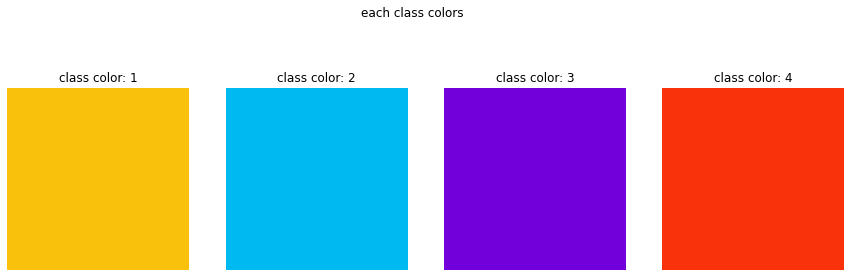

In [ ]:
#https://www.kaggle.com/go1dfish/clear-mask-visualization-and-simple-eda
# Lets define a pallete 
palet = [(249, 192, 12), (0, 185, 241), (114, 0, 218), (249,50,12)]
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(np.ones((50, 50, 3), dtype=np.uint8) * palet[i])
    ax[i].set_title("class color: {}".format(i+1))
fig.suptitle("each class colors")

plt.show()

In [ ]:
# Creating a list to store all the image names in the different defect class
idx_no_defect = []
idx_class_1 = []
idx_class_2 = []
idx_class_3 = []
idx_class_4 = []
idx_class_multi = []
idx_class_triple = []

for col in range(0, len(train_data_all), 4):
    img_names = [str(i).split("_")[0] for i in train_data_all.iloc[col:col+4, 0].values]        
    
    labels = train_data_all.iloc[col:col+4, 2]
    if labels.isna().all():
        idx_no_defect.append(col)
    elif (labels.isna() == [False, True, True, True]).all():
        idx_class_1.append(col)
    elif (labels.isna() == [True, False, True, True]).all():
        idx_class_2.append(col)
    elif (labels.isna() == [True, True, False, True]).all():
        idx_class_3.append(col)
    elif (labels.isna() == [True, True, True, False]).all():
        idx_class_4.append(col)
    elif labels.isna().sum() == 1:
                idx_class_triple.append(col)
    else:
        idx_class_multi.append(col)

In [ ]:
#https://www.kaggle.com/go1dfish/clear-mask-visualization-and-simple-eda
# writing a function to create image mask for the defect area
def name_and_mask(start_idx):
    col = start_idx
    img_names = [str(i).split("_")[0] for i in train_data_all.iloc[col:col+4, 0].values]

    labels = train_data_all.iloc[col:col+4, 2]
    mask = np.zeros((256, 1600, 4), dtype=np.uint8)

    for idx, label in enumerate(labels.values):
        if label is not np.nan:
            mask_label = np.zeros(1600*256, dtype=np.uint8)
            label = label.split(" ")
            positions = map(int, label[0::2])
            length = map(int, label[1::2])
            for pos, le in zip(positions, length):
                mask_label[pos-1:pos+le-1] = 1
            mask[:, :, idx] = mask_label.reshape(256, 1600, order='F')
    return img_names[0], mask

In [ ]:
name ='00031f466.jpg'
type(train_path/name)
str(train_path/name)

'train_images\\00031f466.jpg'

In [ ]:
#https://www.kaggle.com/go1dfish/clear-mask-visualization-and-simple-eda
# function to show the image with the defect outline
def show_mask_image(start_idx):
    name, mask = name_and_mask(start_idx)
    img = cv2.imread(str(train_path / name))
    fig, ax = plt.subplots(figsize=(15, 15))

    for ch in range(4):
        contours, _ = cv2.findContours(mask[:, :, ch], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        for i in range(0, len(contours)):
            cv2.polylines(img, contours[i], True, palet[ch], 2)
    ax.set_title(name)
    ax.imshow(img)
    plt.show()

###3.5.1 No Defect

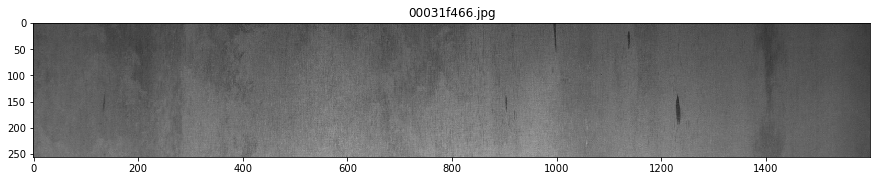

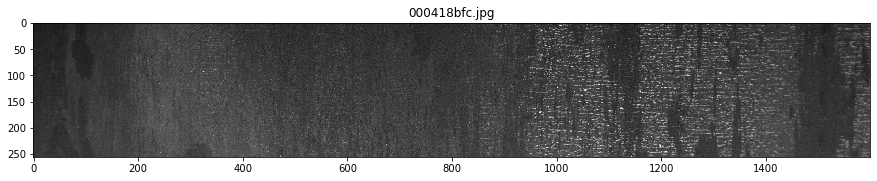

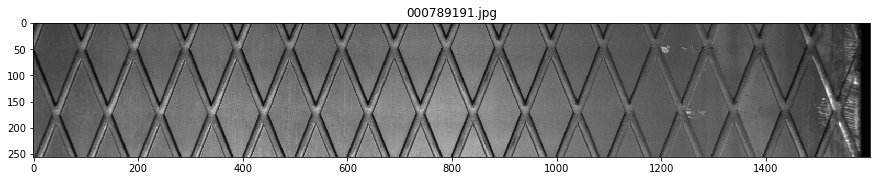

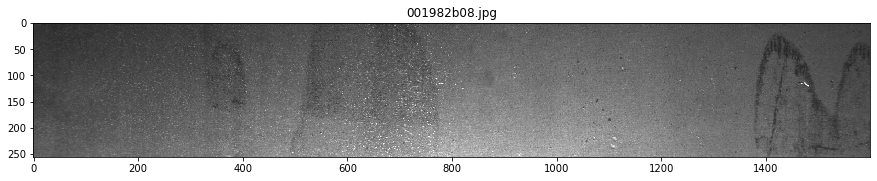

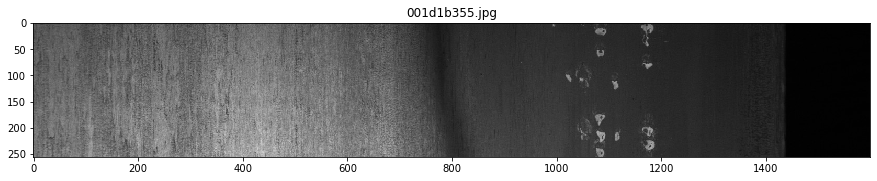

In [ ]:
#### Images with no defect
for idx in idx_no_defect[:5]:
    show_mask_image(idx)

###3.5.2 Defect Class_1

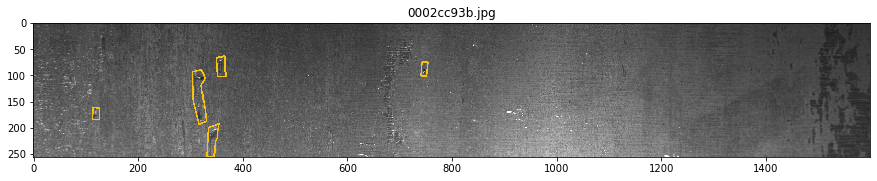

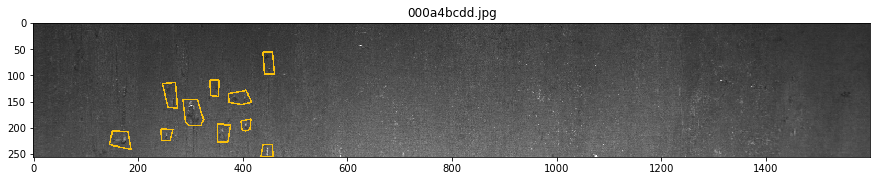

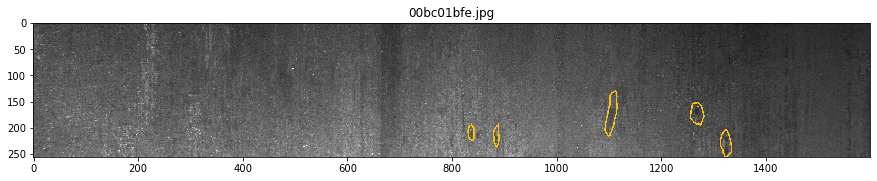

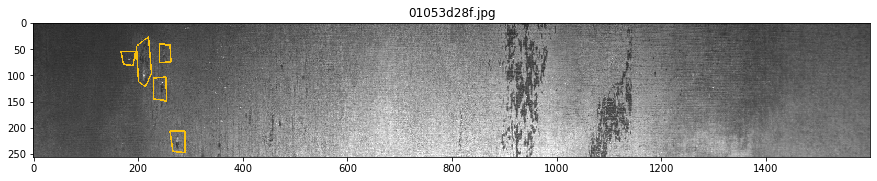

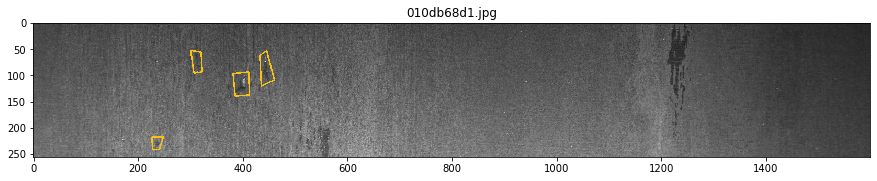

In [ ]:
#### Images with no defect
for idx in idx_class_1[:5]:
    show_mask_image(idx)

###3.5.3 Defect Class_2

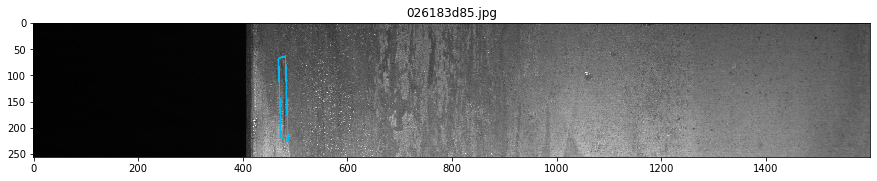

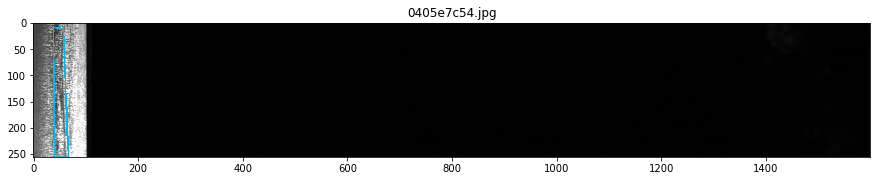

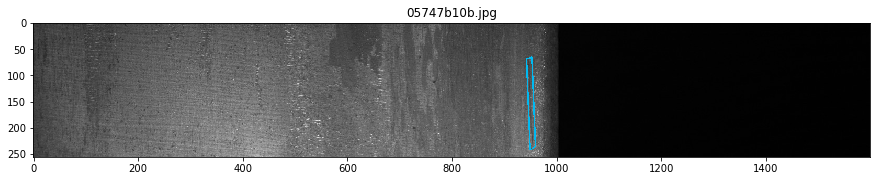

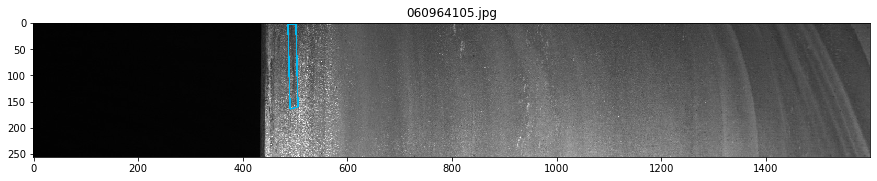

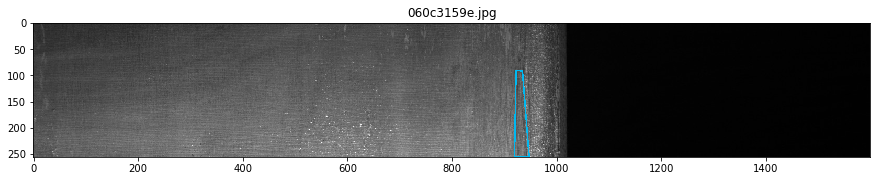

In [ ]:
#### Images with no defect
for idx in idx_class_2[:5]:
    show_mask_image(idx)

###3.5.4 Defect Class_3

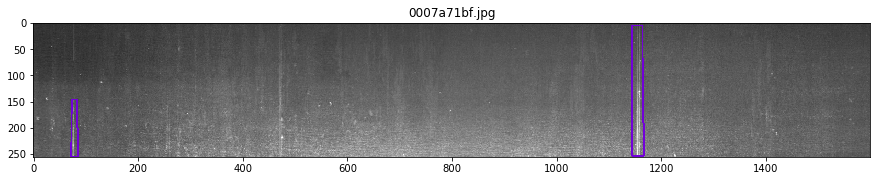

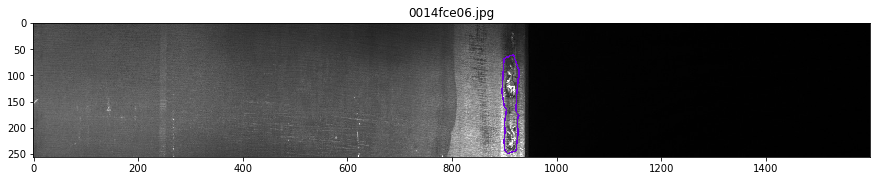

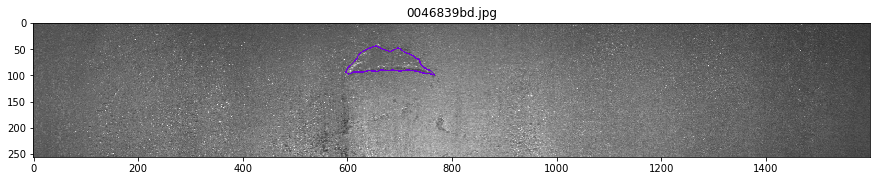

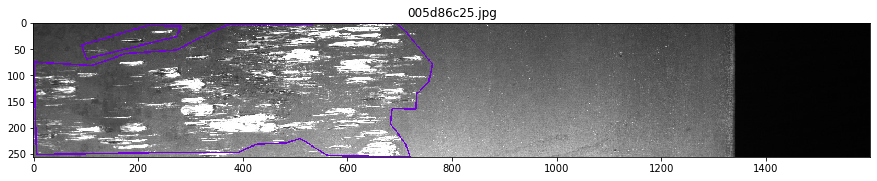

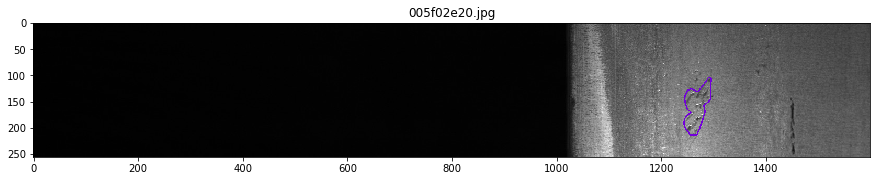

In [ ]:
#### Images with no defect
for idx in idx_class_3[:5]:
    show_mask_image(idx)

###3.5.5 Defect Class_4

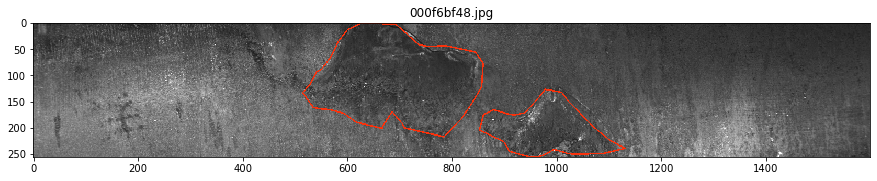

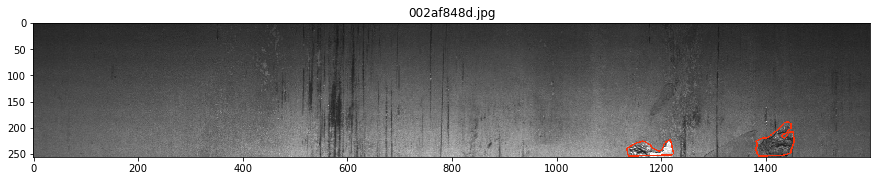

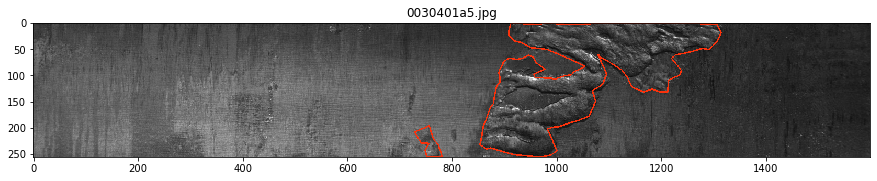

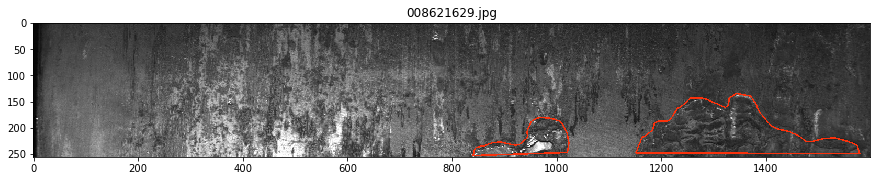

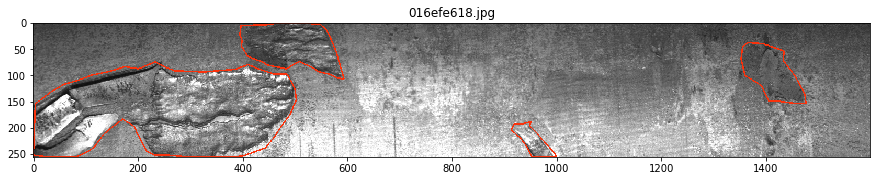

In [ ]:
#### Images with no defect
for idx in idx_class_4[:5]:
    show_mask_image(idx)

###3.5.6 Defect Two_Class

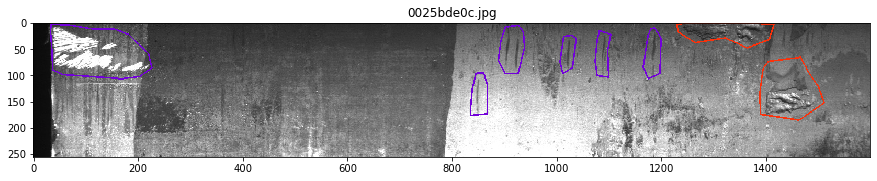

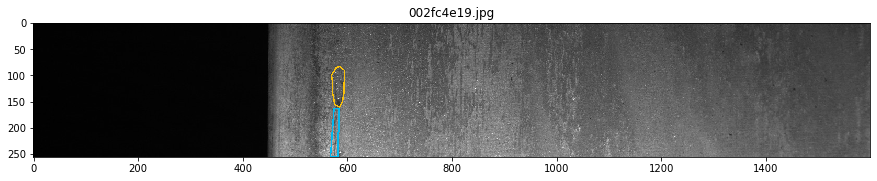

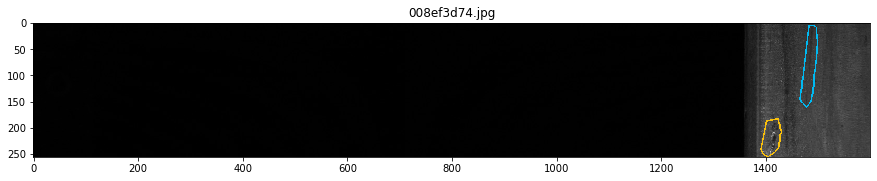

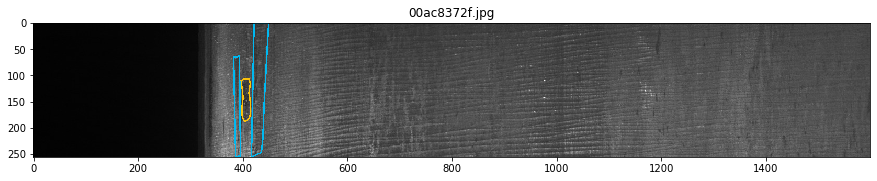

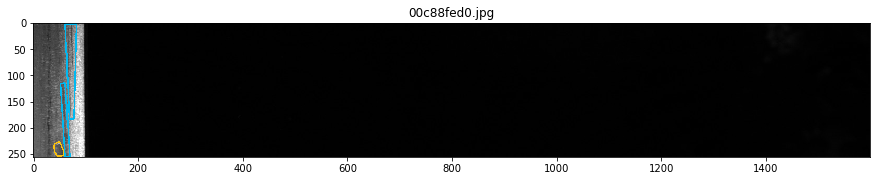

In [ ]:
#### Images with no defect
for idx in idx_class_multi[:5]:
    show_mask_image(idx)

###3.5.7 Defect Multi_Class

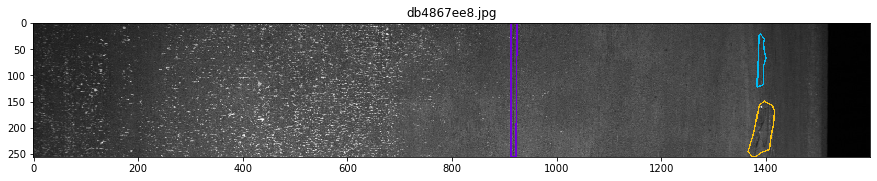

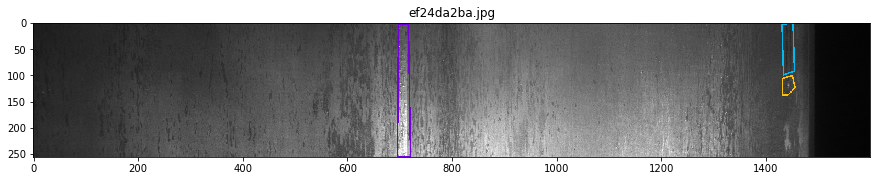

In [ ]:
#### Images with no defect
for idx in idx_class_triple[:5]:
    show_mask_image(idx)

# EDA Conclusions
1. Defective versus Non defective the class is almost balanced with 5902 and 7095 data points respectively

2. There are 4 Defect classes that needs to be predicted for Defective images.

3. These classed are highly imbalanced with distribution of Images across defects as follows ({Defect_3: 5150, Defect_1: 897, Defect_4: 801, Defect_2: 247})

4. Most images have just 1 defect with others having 2 defects. Images with 3 or 4 defects are rare. {Images with 1 defect : 6239, Images with 2 defect: 425, Images with 3 defects: 2, Images with 4 defects: 0}

5. All images across train and test are of the same size

#4  Lets create a data in the form of X and y so that we can train it

In [ ]:
train_data_all.head()

ImageId  ClassId                                      EncodedPixels
0  0002cc93b.jpg        1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1  0002cc93b.jpg        2                                                NaN
2  0002cc93b.jpg        3                                                NaN
3  0002cc93b.jpg        4                                                NaN
4  00031f466.jpg        1                                                NaN

In [ ]:
train_data=train_data_all.pivot(index='ImageId',columns='ClassId',values='EncodedPixels')

In [ ]:
train_data=train_data.reset_index()
train_data.head()


ClassId        ImageId                                                  1  \
0        0002cc93b.jpg  29102 12 29346 24 29602 24 29858 24 30114 24 3...   
1        00031f466.jpg                                                NaN   
2        000418bfc.jpg                                                NaN   
3        000789191.jpg                                                NaN   
4        0007a71bf.jpg                                                NaN   

ClassId    2                                                  3    4  
0        NaN                                                NaN  NaN  
1        NaN                                                NaN  NaN  
2        NaN                                                NaN  NaN  
3        NaN                                                NaN  NaN  
4        NaN  18661 28 18863 82 19091 110 19347 110 19603 11...  NaN

In [ ]:
train_data.columns=['ImageId','Defect_1','Defect_2','Defect_3','Defect_4']

In [ ]:
train_data.head()

ImageId                                           Defect_1 Defect_2  \
0  0002cc93b.jpg  29102 12 29346 24 29602 24 29858 24 30114 24 3...      NaN   
1  00031f466.jpg                                                NaN      NaN   
2  000418bfc.jpg                                                NaN      NaN   
3  000789191.jpg                                                NaN      NaN   
4  0007a71bf.jpg                                                NaN      NaN   

                                            Defect_3 Defect_4  
0                                                NaN      NaN  
1                                                NaN      NaN  
2                                                NaN      NaN  
3                                                NaN      NaN  
4  18661 28 18863 82 19091 110 19347 110 19603 11...      NaN

In [ ]:
def add_columns(df_row):
    labels = df_row[['Defect_1','Defect_2','Defect_3','Defect_4']]
    values_dic={}
    if labels.isna().all():
        values_dic['has_defect'] = 0
        values_dic['has_defect_1'] = 0
        values_dic['has_defect_2'] = 0
        values_dic['has_defect_3'] = 0
        values_dic['has_defect_4'] = 0
        values_dic['no_of_defects'] = 0
    elif (labels.isna() == [False, True, True, True]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 1
        values_dic['has_defect_2'] = 0
        values_dic['has_defect_3'] = 0
        values_dic['has_defect_4'] = 0
        values_dic['no_of_defects'] = 1
    elif (labels.isna() == [True, False, True, True]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 0
        values_dic['has_defect_2'] = 1
        values_dic['has_defect_3'] = 0
        values_dic['has_defect_4'] = 0
        values_dic['no_of_defects'] = 1
    elif (labels.isna() == [True, True, False, True]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 0
        values_dic['has_defect_2'] = 0
        values_dic['has_defect_3'] = 1
        values_dic['has_defect_4'] = 0
        values_dic['no_of_defects'] = 1
    elif (labels.isna() == [True, True, True, False]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 0
        values_dic['has_defect_2'] = 0
        values_dic['has_defect_3'] = 0
        values_dic['has_defect_4'] = 1
        values_dic['no_of_defects'] = 1
    elif (labels.isna() == [False, False, True, True]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 1
        values_dic['has_defect_2'] = 1
        values_dic['has_defect_3'] = 0
        values_dic['has_defect_4'] = 0
        values_dic['no_of_defects'] = 'multi'
    elif (labels.isna() == [False, True, False, True]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 1
        values_dic['has_defect_2'] = 0
        values_dic['has_defect_3'] = 1
        values_dic['has_defect_4'] = 0
        values_dic['no_of_defects'] = 'multi'  
    elif (labels.isna() == [False, True, True, False]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 1
        values_dic['has_defect_2'] = 0
        values_dic['has_defect_3'] = 0
        values_dic['has_defect_4'] = 1
        values_dic['no_of_defects'] = 'multi'   
    elif (labels.isna() == [True, False, False, True]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 0
        values_dic['has_defect_2'] = 1
        values_dic['has_defect_3'] = 1
        values_dic['has_defect_4'] = 0
        values_dic['no_of_defects'] = 'multi' 
    elif (labels.isna() == [True, False, True, False]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 0
        values_dic['has_defect_2'] = 1
        values_dic['has_defect_3'] = 0
        values_dic['has_defect_4'] = 1
        values_dic['no_of_defects'] = 'multi'
    elif (labels.isna() == [True, True, False, False]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 0
        values_dic['has_defect_2'] = 0
        values_dic['has_defect_3'] = 1
        values_dic['has_defect_4'] = 1
        values_dic['no_of_defects'] = 'multi'   
    elif (labels.isna() == [False, False, False, True]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 1
        values_dic['has_defect_2'] = 1
        values_dic['has_defect_3'] = 1
        values_dic['has_defect_4'] = 0
        values_dic['no_of_defects'] = 'multi' 
    elif (labels.isna() == [False, False, True, False]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 1
        values_dic['has_defect_2'] = 1
        values_dic['has_defect_3'] = 0
        values_dic['has_defect_4'] = 1
        values_dic['no_of_defects'] = 'multi' 
    elif (labels.isna() == [False, True, False, False]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 1
        values_dic['has_defect_2'] = 0
        values_dic['has_defect_3'] = 1
        values_dic['has_defect_4'] = 1
        values_dic['no_of_defects'] = 'multi'
    elif (labels.isna() == [True, False, False, False]).all():
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 0
        values_dic['has_defect_2'] = 1
        values_dic['has_defect_3'] = 1
        values_dic['has_defect_4'] = 1
        values_dic['no_of_defects'] = 'multi'  
    else:
        (labels.isna() == [False, False, False, False]).all()
        values_dic['has_defect'] = 1
        values_dic['has_defect_1'] = 1
        values_dic['has_defect_2'] = 1
        values_dic['has_defect_3'] = 1
        values_dic['has_defect_4'] = 1
        values_dic['no_of_defects'] = 'multi' 
    return list(values_dic.values())    

In [ ]:
train_data[['has_defect','has_defect_1','has_defect_2','has_defect_3','has_defect_4','no_of_defects']]=train_data.apply(add_columns,axis=1,result_type="expand")



In [ ]:
train_data.head()

ImageId                                           Defect_1 Defect_2  \
0  0002cc93b.jpg  29102 12 29346 24 29602 24 29858 24 30114 24 3...      NaN   
1  00031f466.jpg                                                NaN      NaN   
2  000418bfc.jpg                                                NaN      NaN   
3  000789191.jpg                                                NaN      NaN   
4  0007a71bf.jpg                                                NaN      NaN   

                                            Defect_3 Defect_4  has_defect  \
0                                                NaN      NaN           1   
1                                                NaN      NaN           0   
2                                                NaN      NaN           0   
3                                                NaN      NaN           0   
4  18661 28 18863 82 19091 110 19347 110 19603 11...      NaN           1   

   has_defect_1  has_defect_2  has_defect_3  has_defect_4 no_of_defects  
0             1             0             0             0             1  
1             0             0             0             0             0  
2             0             0             0             0             0  
3             0             0             0             0             0  
4             0             0             1             0             1

In [ ]:
train_data[train_data['no_of_defects']=='multi']

ImageId                                           Defect_1  \
11     0025bde0c.jpg                                                NaN   
14     002fc4e19.jpg  146021 3 146275 10 146529 40 146783 46 147038 ...   
34     008ef3d74.jpg  356336 4 356587 11 356838 18 357089 25 357340 ...   
37     00ac8372f.jpg  101742 3 101998 12 102253 19 102301 22 102509 ...   
44     00c88fed0.jpg  10474 7 10728 15 10983 18 11239 21 11494 24 11...   
64     012f26693.jpg                                                NaN   
93     01cfacf80.jpg                                                NaN   
174    0391d44d6.jpg                                                NaN   
185    03db6bbc3.jpg                                                NaN   
201    044700866.jpg                                                NaN   
329    07732248e.jpg                                                NaN   
347    07c8ba1d5.jpg                                                NaN   
352    07cbfd1f8.jpg                                                NaN   
393    0888e6a84.jpg                                                NaN   
397    08a1a079b.jpg  43892 5 44139 14 44385 24 44632 33 44879 42 45...   
400    08b40a161.jpg                                                NaN   
411    08de8df60.jpg  19213 3 19469 9 19725 14 19981 20 20237 23 204...   
418    08f9c685f.jpg  184767 4 185019 12 185262 28 185513 35 185765 ...   
452    097eaf94c.jpg                                                NaN   
571    0bc373e44.jpg  34635 47 34891 47 35147 47 35403 47 35659 47 3...   
579    0be9bad7b.jpg                                                NaN   
605    0c888ecb5.jpg                                                NaN   
612    0cb590f8e.jpg  351611 3 351866 7 352121 10 352376 13 352632 1...   
703    0e71cd651.jpg                                                NaN   
735    0f010cc60.jpg  46349 3 46605 8 46861 12 47118 16 47374 21 476...   
785    101648543.jpg                                                NaN   
836    112942aed.jpg  382910 18 383150 36 383405 40 383660 43 383915...   
942    139b7e692.jpg                                                NaN   
958    13fa1d70d.jpg                                                NaN   
962    140e59cff.jpg  339700 13 339930 39 340161 64 340392 89 340622...   
...              ...                                                ...   
11787  ef8ba30c0.jpg                                                NaN   
11788  ef8c8a263.jpg                                                NaN   
11840  f0dbecd3d.jpg                                                NaN   
11848  f10768627.jpg  42629 2 42885 6 43141 10 43397 14 43653 18 439...   
11881  f1becb8a5.jpg                                                NaN   
11963  f383950e8.jpg                                                NaN   
11970  f3a9b7ad1.jpg  100737 7 100981 19 101225 31 101469 43 101718 ...   
12062  f5b50a959.jpg  177004 26 177253 42 177343 15 177427 11 177502...   
12086  f618df512.jpg  361285 4 361541 11 361796 18 362052 25 362308 ...   
12097  f64bb97a6.jpg                                                NaN   
12130  f6eb68937.jpg                                                NaN   
12133  f6f7902a9.jpg                                                NaN   
12180  f806c9662.jpg                                                NaN   
12192  f83aa5759.jpg  55832 22 56088 22 56343 23 56599 23 56854 24 5...   
12208  f88d122b9.jpg                                                NaN   
12251  f9668c7cd.jpg                                                NaN   
12267  f9d0f27a0.jpg                                                NaN   
12280  fa3a68a38.jpg  389929 10 390183 26 390438 35 390693 38 390947...   
12314  fad2dd8ee.jpg                                                NaN   
12334  fb357de4d.jpg                                                NaN   
12350  fb9558035.jpg                                                NaN   
12351  fb9a07c8f.jpg  142046 12 142300

In [ ]:
train_data.to_csv('input/train_data.csv')

In [ ]:
!pwd

/content


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Severstal

/content/drive/My Drive/Colab Notebooks/Severstal


In [ ]:
train_data=pd.read_csv('input/train_data.csv', index_col=0)

In [ ]:
train_data.head()

ImageId  ... no_of_defects
0  0002cc93b.jpg  ...             1
1  00031f466.jpg  ...             0
2  000418bfc.jpg  ...             0
3  000789191.jpg  ...             0
4  0007a71bf.jpg  ...             1

[5 rows x 11 columns]

##4.1 Lets look at the distribution of the defect areas across Defect types

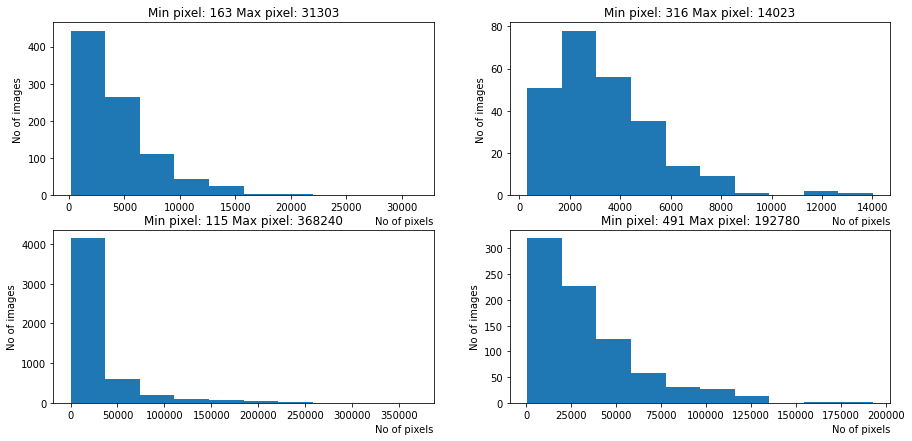

In [ ]:
fig,a =  plt.subplots(2,2,figsize=(15,7))
# Defect_1
area_defect1 = train_data[train_data['has_defect_1']==1]['Defect_1'].apply(lambda pixels : sum(int(pixel) for pixel in pixels.split(' ')[1::2]) )
a[0,0].hist(area_defect1.values)
a[0,0].set_xlabel("No of pixels",horizontalalignment='right', x=1.0)
a[0,0].set_ylabel("No of images")
a[0,0].set_title("Min pixel: {min} Max pixel: {max}".format(min=min(area_defect1.values), max=max(area_defect1.values)))

# Defect_2
area_defect2 = train_data[train_data['has_defect_2']==1]['Defect_2'].apply(lambda pixels : sum(int(pixel) for pixel in pixels.split(' ')[1::2]) )
a[0,1].hist(area_defect2.values)
a[0,1].set_xlabel("No of pixels",horizontalalignment='right', x=1.0)
a[0,1].set_ylabel("No of images")
a[0,1].set_title("Min pixel: {min} Max pixel: {max}".format(min=min(area_defect2.values), max=max(area_defect2.values)))

# Defect_3
area_defect3 = train_data[train_data['has_defect_3']==1]['Defect_3'].apply(lambda pixels : sum(int(pixel) for pixel in pixels.split(' ')[1::2]) )
a[1,0].hist(area_defect3.values)
a[1,0].set_xlabel("No of pixels",horizontalalignment='right', x=1.0)
a[1,0].set_ylabel("No of images")
a[1,0].set_title("Min pixel: {min} Max pixel: {max}".format(min=min(area_defect3.values), max=max(area_defect3.values)))

# Defect_4
area_defect4 = train_data[train_data['has_defect_4']==1]['Defect_4'].apply(lambda pixels : sum(int(pixel) for pixel in pixels.split(' ')[1::2]) )
a[1,1].hist(area_defect4.values)
a[1,1].set_xlabel("No of pixels",horizontalalignment='right', x=1.0)
a[1,1].set_ylabel("No of images")
a[1,1].set_title("Min pixel: {min} Max pixel: {max}".format(min=min(area_defect4.values), max=max(area_defect4.values)))

plt.show()

# Lets do some deep dive into defect size of each defect type

In [ ]:
print("Total no of images of Defect1:",len(area_defect1))
print("No of images with areas less than 200 pixels:",len(area_defect1.values[area_defect1.values<200]))
print("No of images with areas less than 300 pixels:",len(area_defect1.values[area_defect1.values<300]))
print("No of images with areas less than 400 pixels:",len(area_defect1.values[area_defect1.values<400]))
print("No of images with areas less than 500 pixels:",len(area_defect1.values[area_defect1.values<500]))
print("No of images with areas less than 600 pixels:",len(area_defect1.values[area_defect1.values<600]))

Total no of images of Defect1: 897
No of images with areas less than 200 pixels: 1
No of images with areas less than 300 pixels: 6
No of images with areas less than 400 pixels: 6
No of images with areas less than 500 pixels: 12
No of images with areas less than 600 pixels: 22


In [ ]:
print("Total no of images of Defect2:",len(area_defect2))

print("No of images with areas less than 400 pixels:",len(area_defect2.values[area_defect2.values<400]))
print("No of images with areas less than 500 pixels:",len(area_defect2.values[area_defect2.values<500]))
print("No of images with areas less than 600 pixels:",len(area_defect2.values[area_defect2.values<600]))
print("No of images with areas less than 700 pixels:",len(area_defect2.values[area_defect2.values<700]))
print("No of images with areas less than 800 pixels:",len(area_defect2.values[area_defect2.values<800]))

Total no of images of Defect2: 247
No of images with areas less than 400 pixels: 1
No of images with areas less than 500 pixels: 2
No of images with areas less than 600 pixels: 4
No of images with areas less than 700 pixels: 5
No of images with areas less than 800 pixels: 8


In [ ]:
print("Total no of images of Defect3:",len(area_defect3))

print("No of images with areas less than 400 pixels:",len(area_defect3.values[area_defect3.values<400]))
print("No of images with areas less than 500 pixels:",len(area_defect3.values[area_defect3.values<500]))
print("No of images with areas less than 600 pixels:",len(area_defect3.values[area_defect3.values<600]))
print("No of images with areas less than 700 pixels:",len(area_defect3.values[area_defect3.values<700]))
print("No of images with areas less than 800 pixels:",len(area_defect3.values[area_defect3.values<800]))

Total no of images of Defect3: 5150
No of images with areas less than 400 pixels: 20
No of images with areas less than 500 pixels: 26
No of images with areas less than 600 pixels: 36
No of images with areas less than 700 pixels: 49
No of images with areas less than 800 pixels: 58


In [ ]:
print("Total no of images of Defect4:",len(area_defect4))

print("No of images with areas less than 1300 pixels:",len(area_defect4.values[area_defect4.values<1300]))
print("No of images with areas less than 1500 pixels:",len(area_defect4.values[area_defect4.values<1500]))
print("No of images with areas less than 1700 pixels:",len(area_defect4.values[area_defect4.values<1700]))
print("No of images with areas less than 1900 pixels:",len(area_defect4.values[area_defect4.values<1900]))
print("No of images with areas less than 2000 pixels:",len(area_defect4.values[area_defect4.values<2000]))

Total no of images of Defect4: 801
No of images with areas less than 1300 pixels: 1
No of images with areas less than 1500 pixels: 2
No of images with areas less than 1700 pixels: 4
No of images with areas less than 1900 pixels: 5
No of images with areas less than 2000 pixels: 10


### If we try to ignore 1% of the Defect Images as the area is very small we will get threshold as follows for our filtering

1. Defect 1 - 400
2. Defect 2 - 500
3. Defect 3 - 800
4. Defect 4 - 1900